In [1]:
import numpy as np
import pandas as pd
import scipy.io.matlab as mat
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# phys_mat = mat.loadmat('s2s_mitbih_aami.mat')
#
# #keys = phys_mat.keys()
# keys
# phys_mat['__header__']
# phys_mat['__version__']
# phys_mat['__globals__']
# phys = phys_mat['s2s_mitbih']
# type(phys)
# phys[0]

In [2]:

df = pd.read_csv('ecg_kaggle/mitbih_train.csv', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [3]:
y_orig, X_orig = df.iloc[:,-1].astype(int), df.iloc[:,:-1]
labels = y_orig.unique()
labels



array([0, 1, 2, 3, 4])

In [4]:
y = y_orig.values
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()


len(C0), len(C1), len(C2), len(C3), len(C4)

(72471, 2223, 5788, 641, 6431)

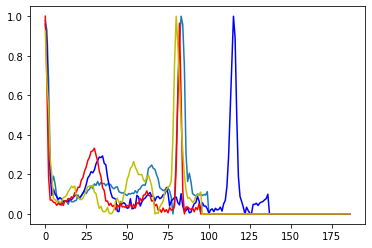

In [5]:
from fastdtw import fastdtw, dtw
X = X_orig
res = fastdtw(X.iloc[0], X.iloc[1])
res

plt.plot(X.iloc[0])
plt.plot(X.iloc[1], 'b')
plt.plot(X.iloc[2], 'r')
plt.plot(X.iloc[3], 'y')

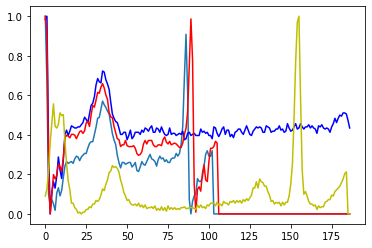

In [7]:
plt.plot(X.iloc[C1[0]])
plt.plot(X.iloc[C1[1]], 'b')
plt.plot(X.iloc[C1[2]], 'r')
plt.plot(X.iloc[C1[3]], 'y')

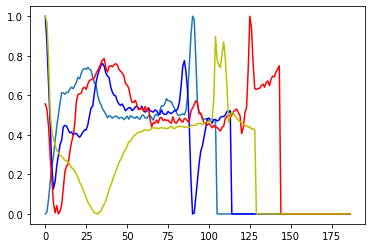

In [9]:
plt.plot(X.iloc[C2[0]])
plt.plot(X.iloc[C2[1]], 'b')
plt.plot(X.iloc[C2[2]], 'r')
plt.plot(X.iloc[C2[3]], 'y')

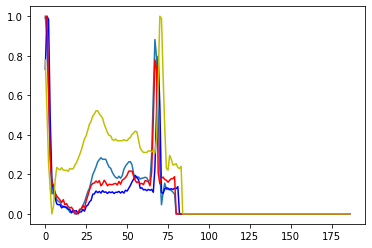

In [10]:
plt.plot(X.iloc[C3[0]])
plt.plot(X.iloc[C3[1]], 'b')
plt.plot(X.iloc[C3[2]], 'r')
plt.plot(X.iloc[C3[3]], 'y')

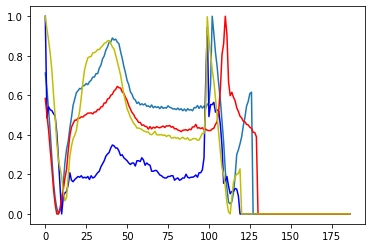

In [11]:
plt.plot(X.iloc[C4[0]])
plt.plot(X.iloc[C4[1]], 'b')
plt.plot(X.iloc[C4[2]], 'r')
plt.plot(X.iloc[C4[3]], 'y')


In [12]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split

In [26]:
X=X_orig
y=y_orig

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, stratify=y, random_state=0)

brf = BalancedRandomForestClassifier(
    n_estimators=1000, class_weight= {0:100,1:1,1:1,1:1,1:1}, #{0:1,1:3,1:2,1:20,1:1},  #'balanced'.
    random_state=0, n_jobs=-1, oob_score = True)
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred,     target_names=['N','A1','A2','A3','UC']))


C:\software\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:591: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


                   pre       rec       spe        f1       geo       iba       sup

          N       0.98      0.79      0.91      0.87      0.85      0.71     54354
         A1       0.30      0.70      0.96      0.42      0.82      0.65      1667
         A2       0.56      0.81      0.95      0.66      0.88      0.77      4341
         A3       0.07      0.88      0.92      0.13      0.90      0.80       481
         UC       0.77      0.93      0.98      0.85      0.96      0.91      4823

avg / total       0.91      0.80      0.92      0.84      0.86      0.73     65666



In [27]:
X=X_orig
y=y_orig

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, stratify=y, random_state=0)

brf = BalancedRandomForestClassifier(
    n_estimators=1000, class_weight= {0:1,1:10,1:10,1:10,1:10}, #{0:1,1:3,1:2,1:20,1:1},  #'balanced'.
    random_state=0, n_jobs=-1, oob_score = True)
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred,     target_names=['N','A1','A2','A3','UC']))


C:\software\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:591: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


                   pre       rec       spe        f1       geo       iba       sup

          N       0.98      0.76      0.93      0.86      0.84      0.70     54354
         A1       0.19      0.81      0.91      0.31      0.86      0.73      1667
         A2       0.53      0.86      0.95      0.66      0.90      0.81      4341
         A3       0.10      0.88      0.94      0.17      0.91      0.82       481
         UC       0.87      0.93      0.99      0.90      0.96      0.91      4823

avg / total       0.92      0.78      0.94      0.83      0.86      0.72     65666



In [28]:
X=X_orig
y=y_orig

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, stratify=y, random_state=0)

brf = BalancedRandomForestClassifier(
    n_estimators=1000, class_weight= {0:1,1:100,1:100,1:100,1:100}, #{0:1,1:3,1:2,1:20,1:1},  #'balanced'.
    random_state=0, n_jobs=-1, oob_score = True)
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred,     target_names=['N','A1','A2','A3','UC']))



C:\software\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:591: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


                   pre       rec       spe        f1       geo       iba       sup

          N       0.98      0.71      0.92      0.82      0.81      0.64     54354
         A1       0.14      0.78      0.87      0.23      0.83      0.68      1667
         A2       0.54      0.82      0.95      0.65      0.89      0.77      4341
         A3       0.08      0.89      0.93      0.16      0.91      0.82       481
         UC       0.83      0.92      0.99      0.87      0.95      0.90      4823

avg / total       0.91      0.73      0.93      0.79      0.82      0.67     65666



In [51]:
X1=X_orig  #.iloc[:,10:160]
y1=y_orig

X2 = pd.concat( [X_orig.iloc[:,:25]*0, X_orig.iloc[:,:-25]], axis=1)
y2 = y_orig

X3 = pd.concat( [X_orig.iloc[:,:50]*0, X_orig.iloc[:,:-50]], axis=1)
y3 = y_orig

X2.columns = X3.columns = X1.columns
X = pd.concat([X1,X2, X3])
y = pd.concat([y1,y2,y3])
y.index = range(len(y))

In [53]:
# X=X1
# y=y1

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, stratify=y, random_state=0)

brf = BalancedRandomForestClassifier(
    n_estimators=1000, #class_weight= 'balanced', #{0:1,1:3,1:2,1:20,1:1},  #'balanced'.
    random_state=0, n_jobs=-1, oob_score = True)
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred,     target_names=['N','A1','A2','A3','UC']))


C:\software\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:591: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


                   pre       rec       spe        f1       geo       iba       sup

          N       0.98      0.74      0.93      0.84      0.83      0.68    163060
         A1       0.24      0.76      0.94      0.36      0.84      0.70      5002
         A2       0.44      0.85      0.92      0.58      0.89      0.78     13023
         A3       0.08      0.89      0.92      0.14      0.91      0.82      1442
         UC       0.81      0.92      0.98      0.86      0.95      0.90     14470

avg / total       0.91      0.76      0.94      0.81      0.84      0.70    196997



In [45]:
X3.columns == X1.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [32]:
(0*X).head()

,10,11,12,13,14,15,16,17,18,19,...,150,151,152,153,154,155,156,157,158,159
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
